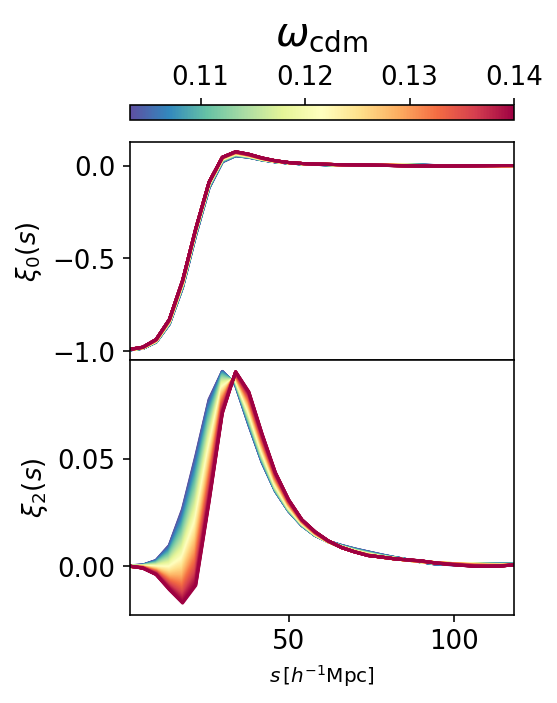

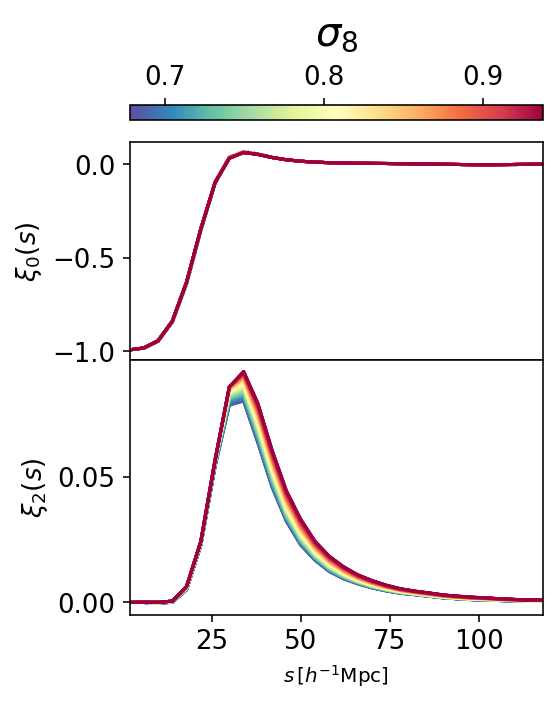

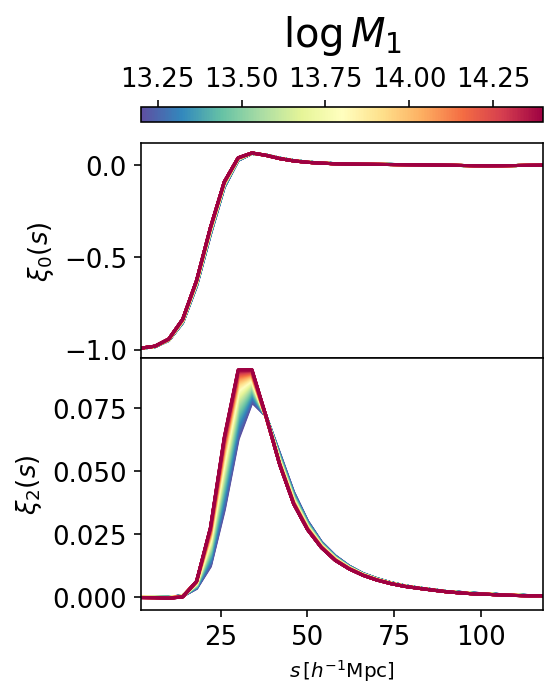

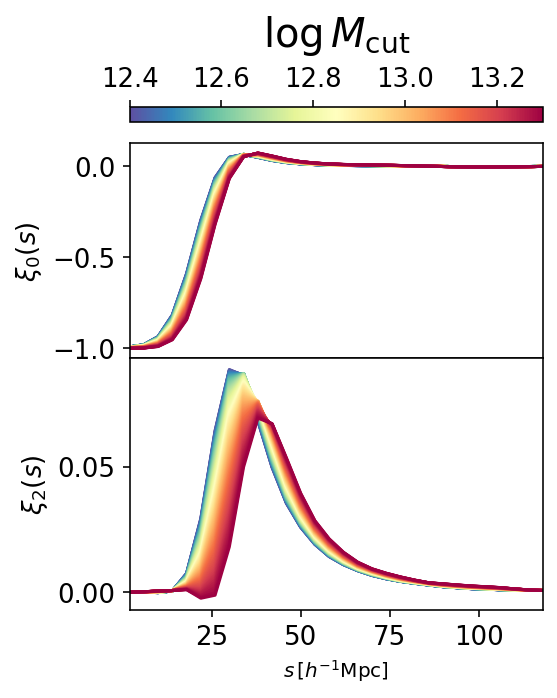

In [1]:
from sunbird.summaries import VoxelVoids
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


priors = {
    "omega_b": [0.0207, 0.0243],
    "omega_cdm": [0.1032, 0.140],
    "sigma8_m": [0.678, 0.938],
    "n_s": [0.9012, 1.025],
    "nrun": [-0.038, 0.038],
    "N_ur": [1.188, 2.889],
    "w0_fld": [-1.22, -0.726],
    "wa_fld": [-0.628, 0.621],
    "logM1": [13.2, 14.4],
    "logM_cut": [12.4, 13.3],
    "alpha": [0.7, 1.5],
    "alpha_s": [0.7, 1.3],
    "alpha_c": [0.0, 0.5],
    "logsigma": [-3.0, 0.0],
    "kappa": [0.0, 1.5],
    "B_cen": [-0.5, 0.5],
    "B_sat": [-1.0, 1.0],
}
labels = {
    'omega_cdm': r'$\omega_{\rm cdm}$',
    'sigma8_m': r'$\sigma_8$',
    'n_s': r'$n_s$',
    'nrun': r'$\alpha_s$',
    'N_ur': r'$N_{\rm ur}$',
    'w0_fld': r'$w_0$',
    'wa_fld': r'$w_a$',
    'logM1': r'$\log M_1$',
    'logM_cut': r'$\log M_{\rm cut}$',
}


emulator = VoxelVoids()
s = emulator.coordinates['s']

select_filters = {
    'multipoles': [0, 2]
}
slice_filters = {
    's': [0, 150]
}
spow = 0

for param_name in ['omega_cdm', 'sigma8_m', 'logM1', 'logM_cut',]:

    fig, ax = plt.subplots(2, 1, figsize=(4, 5), sharex=True)

    cosmo_params = {'omega_b': 0.02, 'omega_cdm': 0.12, 'sigma8_m': 0.8,
                    'n_s': 0.96, 'nrun': 0.0, 'N_ur':2.03, 'w0_fld': -1.0, 'wa_fld': 0.0}
    hod_params = {'logM1': 13.9, 'logM_cut': 12.6, 'alpha': 0.75, 'alpha_s': 1.0,
                'alpha_c': 0.3, 'logsigma': -1.8, 'kappa': 0.1, 'B_cen': 0.0, 'B_sat': 0.0}
    parameters = {**cosmo_params, **hod_params}

    prior_sample = np.linspace(priors[param_name][0], priors[param_name][1], 100)
    prior_norm = prior_sample - prior_sample.min()
    prior_norm /= prior_norm.max()

    cmap = matplotlib.cm.get_cmap('Spectral_r')

    for i, param_value in enumerate(prior_sample):
        parameters[param_name] = param_value
        prediction, error = emulator(
            param_dict=parameters,
            select_filters=select_filters,
            slice_filters=slice_filters,
        )
        prediction = prediction.numpy()
        ax[0].plot(s, s**spow*prediction[:len(s)], color=cmap(prior_norm[i]))
        ax[1].plot(s, s**spow*prediction[len(s):], color=cmap(prior_norm[i]))

    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('top', size="7%", pad=0.15)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=prior_sample.min(), vmax=prior_sample.max()))
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    cbar.set_label(labels[param_name], rotation=0, labelpad=10, fontsize=20)
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    for aa in fig.axes:
        aa.tick_params(axis='both', which='major', labelsize=13)
        aa.tick_params(axis='both', which='minor', labelsize=13)

    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].set_xlim(s.min(), s.max())
    if spow == 2:
        ax[0].set_ylabel(rf'$s^2\xi_{0}(s)\,[h^{{-2}}{{\rm Mpc}}^2]$', fontsize=13)
        ax[1].set_ylabel(rf'$s^2\xi_{2}(s)\,[h^{{-2}}{{\rm Mpc}}^2]$', fontsize=13)
    else:
        ax[0].set_ylabel(rf'$\xi_{0}(s)$', fontsize=13)
        ax[1].set_ylabel(rf'$\xi_{2}(s)$', fontsize=13)
        # ax[0].set_xlim(0, 80)
    ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.0)
    # plt.savefig(f'fig/parameter_dependence_density_split_cross_{param_name}_nos2.pdf', bbox_inches='tight')

    plt.show()